In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns


In [2]:
# import datasets
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
# Display Options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Voorbeeld van de data bekijken
print(df.head())
# Dataset variabelen verkennen
print(df.info())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7          

In [4]:
# Data opschonen
df = df.fillna(0)
# Selecteer alle niet numerieke kolommen
non_numeric_cols = df.select_dtypes(exclude='number')
# Maak voor elke kolom een value mapping naar numeriek. (Benodigd voor random forest algoritme)
for column in non_numeric_cols.columns:
    # Maak een lege dict aan voor de value mapping
    value_mapping = {}
    # Geef elke unieke waarde in de kolom een numerieke waarde
    for unique_value in df[column].unique():
        value_mapping[unique_value] = len(value_mapping) + 1
    # Map de numerieke waarde aan de kolom waarde
    df[column] = df[column].map(value_mapping)

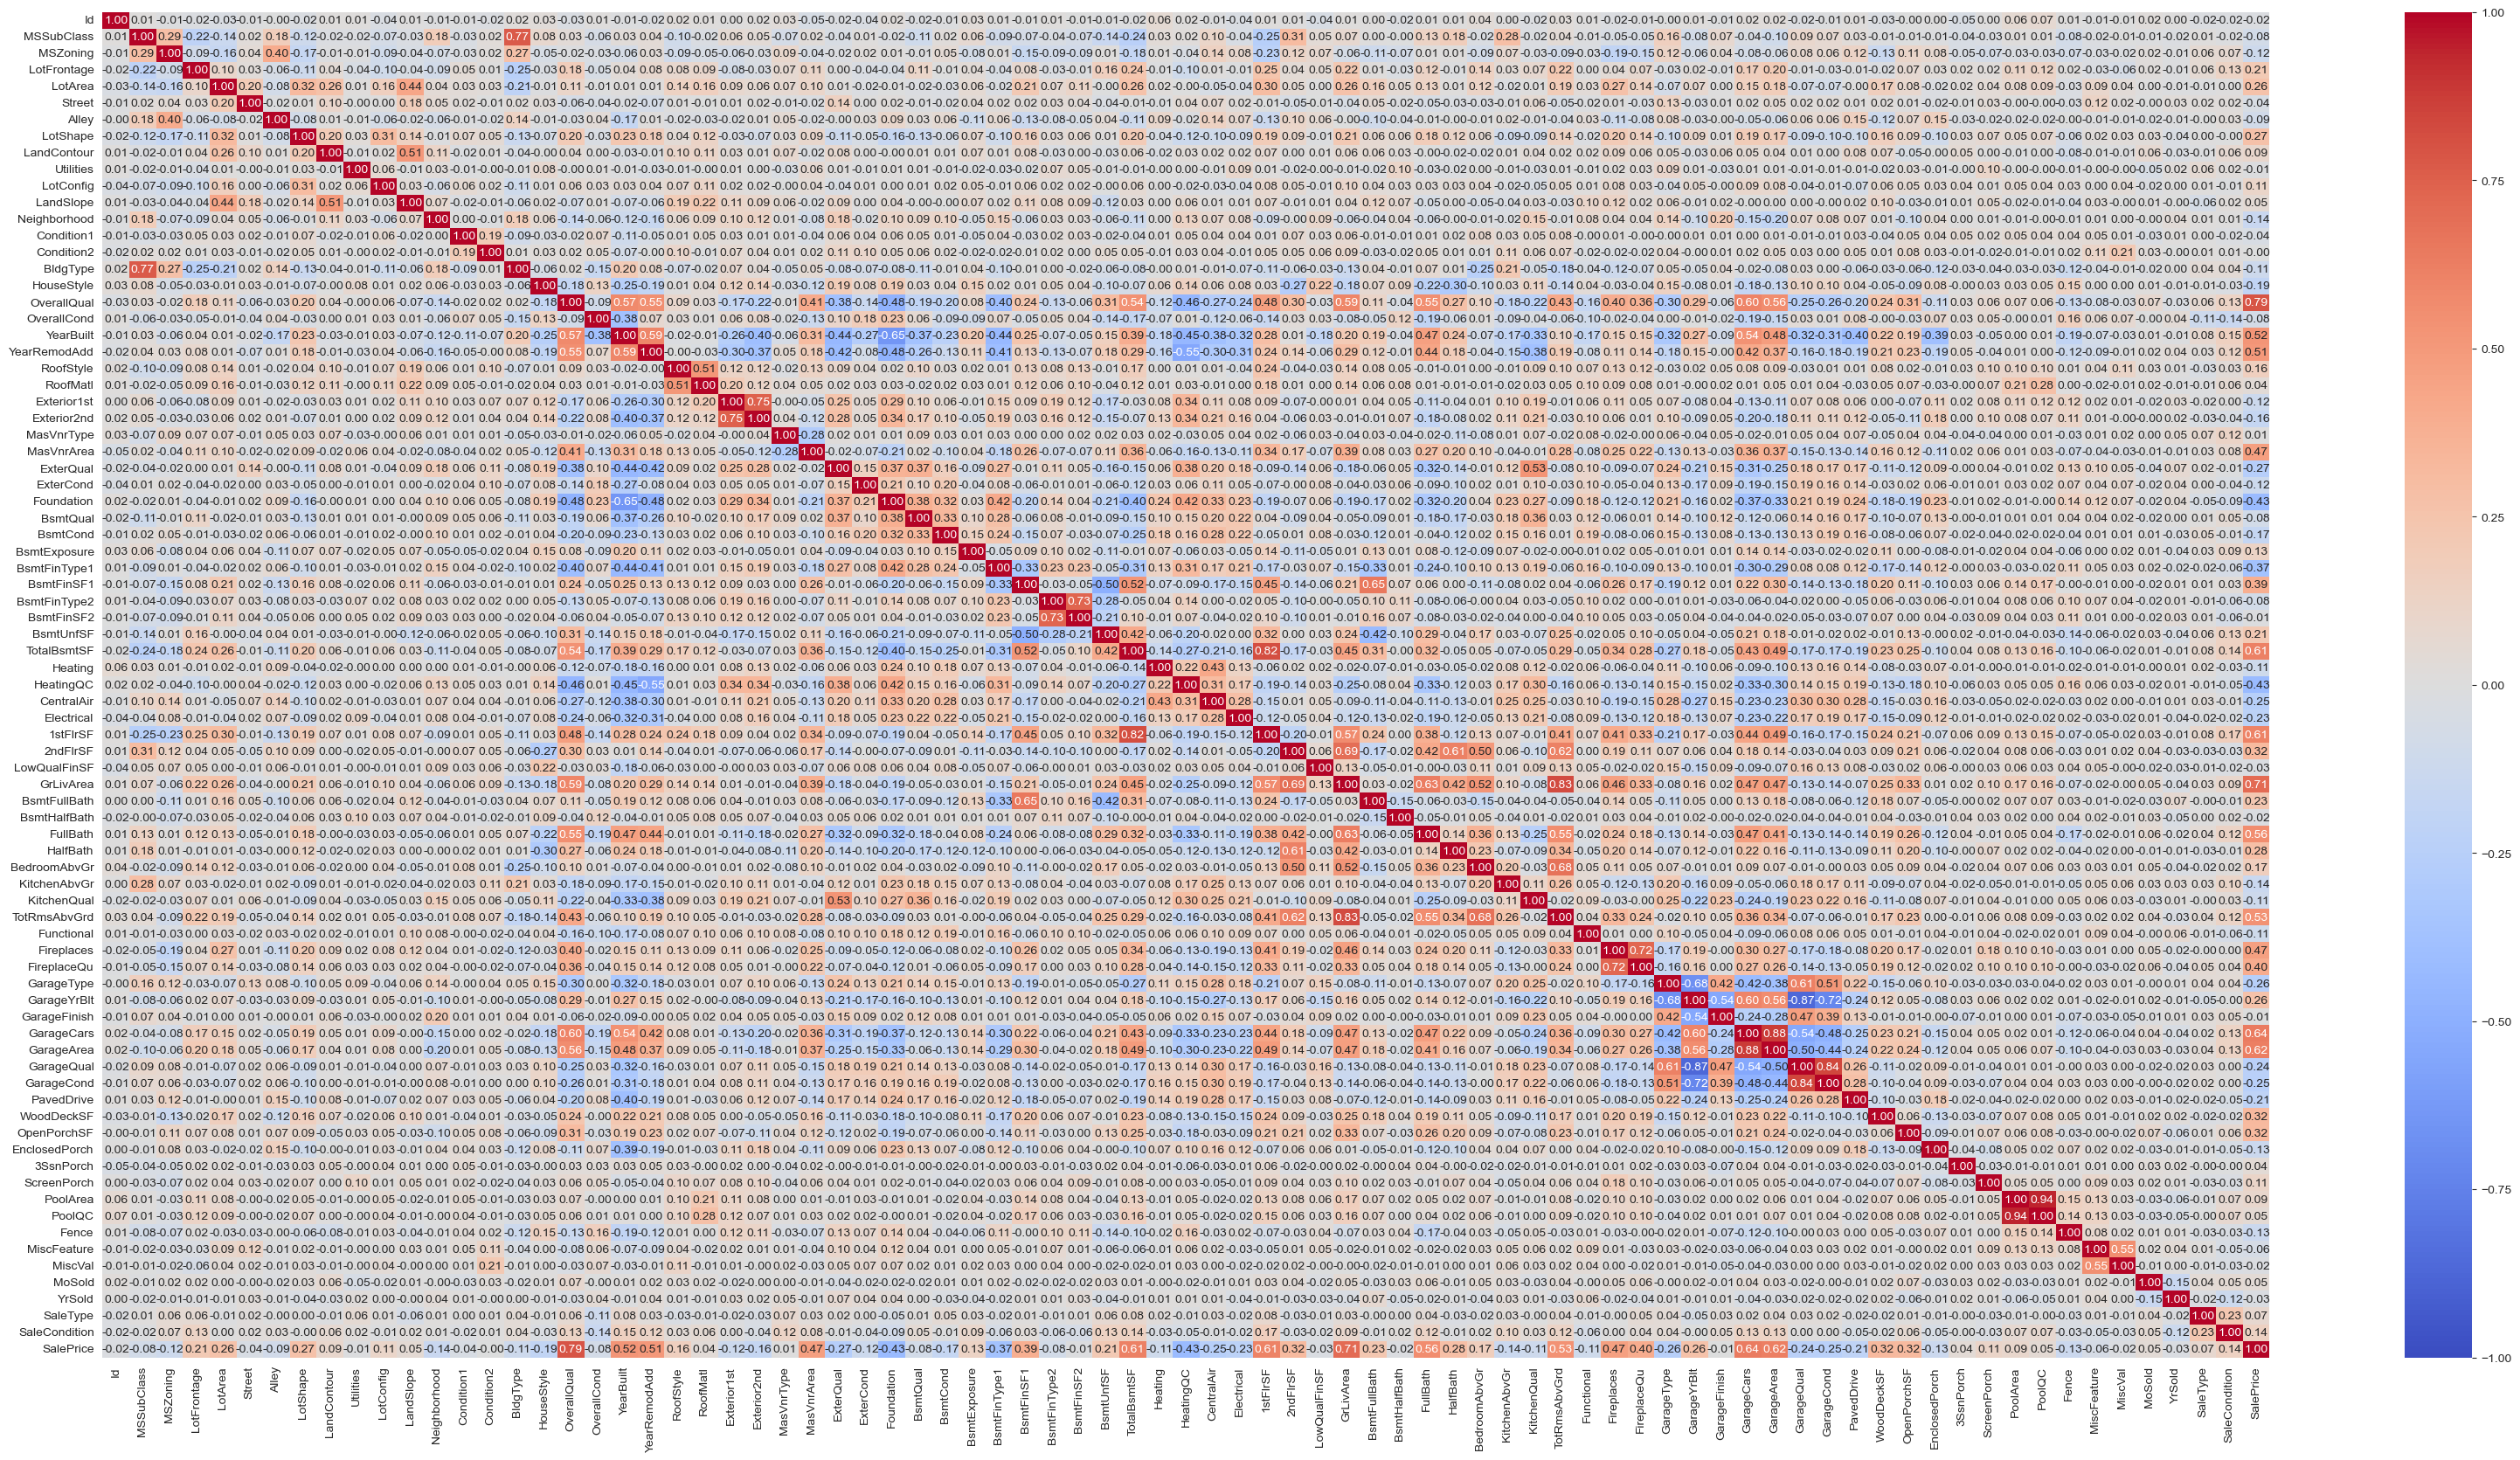

In [5]:
# Correlatie heatmap maken
corr_matrix = df.corr()
plt.figure(figsize=(40, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.show()

In [6]:
# Subset dataset voor regressie model
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [7]:
# Subset dataset voor regressie model
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Verdeel de data in train en test sets 80% trainen en 20% testen
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# init lineair regressie model, 100 decision trees
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit het model op de trainingsdata
model.fit(X_train, Y_train)

# Maak voorspellingen op de test set
y_pred = model.predict(X_test)

Score: 97.93


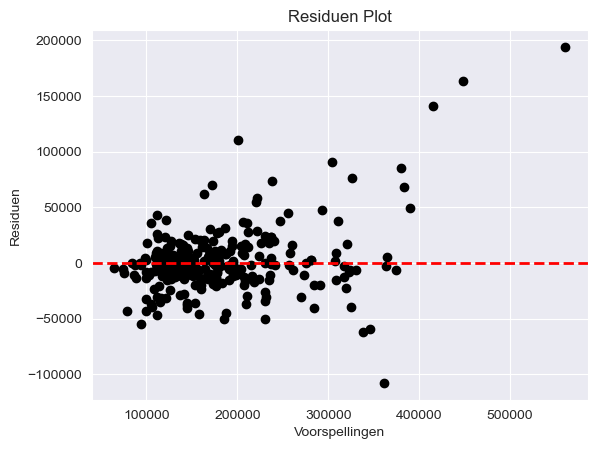

In [10]:
# Bereken en print score
model.score(X_train, Y_train)
score = round(model.score(X_train, Y_train) * 100, 2)
print(f'Score: {score}')

# Maak plot voor de regressielijn -> Werkt alleen maar met enkele variabelen
# plt.scatter(X_test, Y_test, color='black', label='Actual')
# plt.scatter(X_test, y_pred, color='red', label='Predicted')
# sort_order = np.argsort(X_test.values.flatten())
# plt.plot(X_test.values[sort_order], y_pred[sort_order], color='blue', linewidth=3, label='Regression Line')

# plt.title('Random Forest Regression')
# plt.xlabel('GrLivArea')
# plt.ylabel('SalePrice')
# plt.legend()
# plt.show()

# Laat de meest interessante waardes zien (interessant om te bepale welke waardes nuttig zijn, kan ook met correlatie heatmap):
importances = pd.DataFrame({'feature': X_train.columns, 'importance': np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance', ascending=False).set_index('feature')

# Residuen plot
residu = Y_test - y_pred
plt.scatter(y_pred, residu, color='black')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuen Plot')
plt.xlabel('Voorspellingen')
plt.ylabel('Residuen')
plt.show()

In [11]:
# Import nieuwe packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [12]:
# Laat borstkanker dataset in
cdf = pd.read_csv('breast_cancer_data.csv')

In [13]:
# Data verkenning
cdf.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [14]:
# Data types
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [16]:
# Bekijk null-waardes per kolom
cdf.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [17]:
# Kolom unnamed bevat geen nuttige data. Verwijder uit de dataset.
cdf = cdf.drop('Unnamed: 32', axis=1)
# Alleen kolom diagnosis is niet numeriek. Alle waardes moeten naar numeriek
# waardes bestaan uit: B of M
cdf['diagnosis'] = cdf['diagnosis'].apply(lambda x: 0 if x == 'B' else 1)

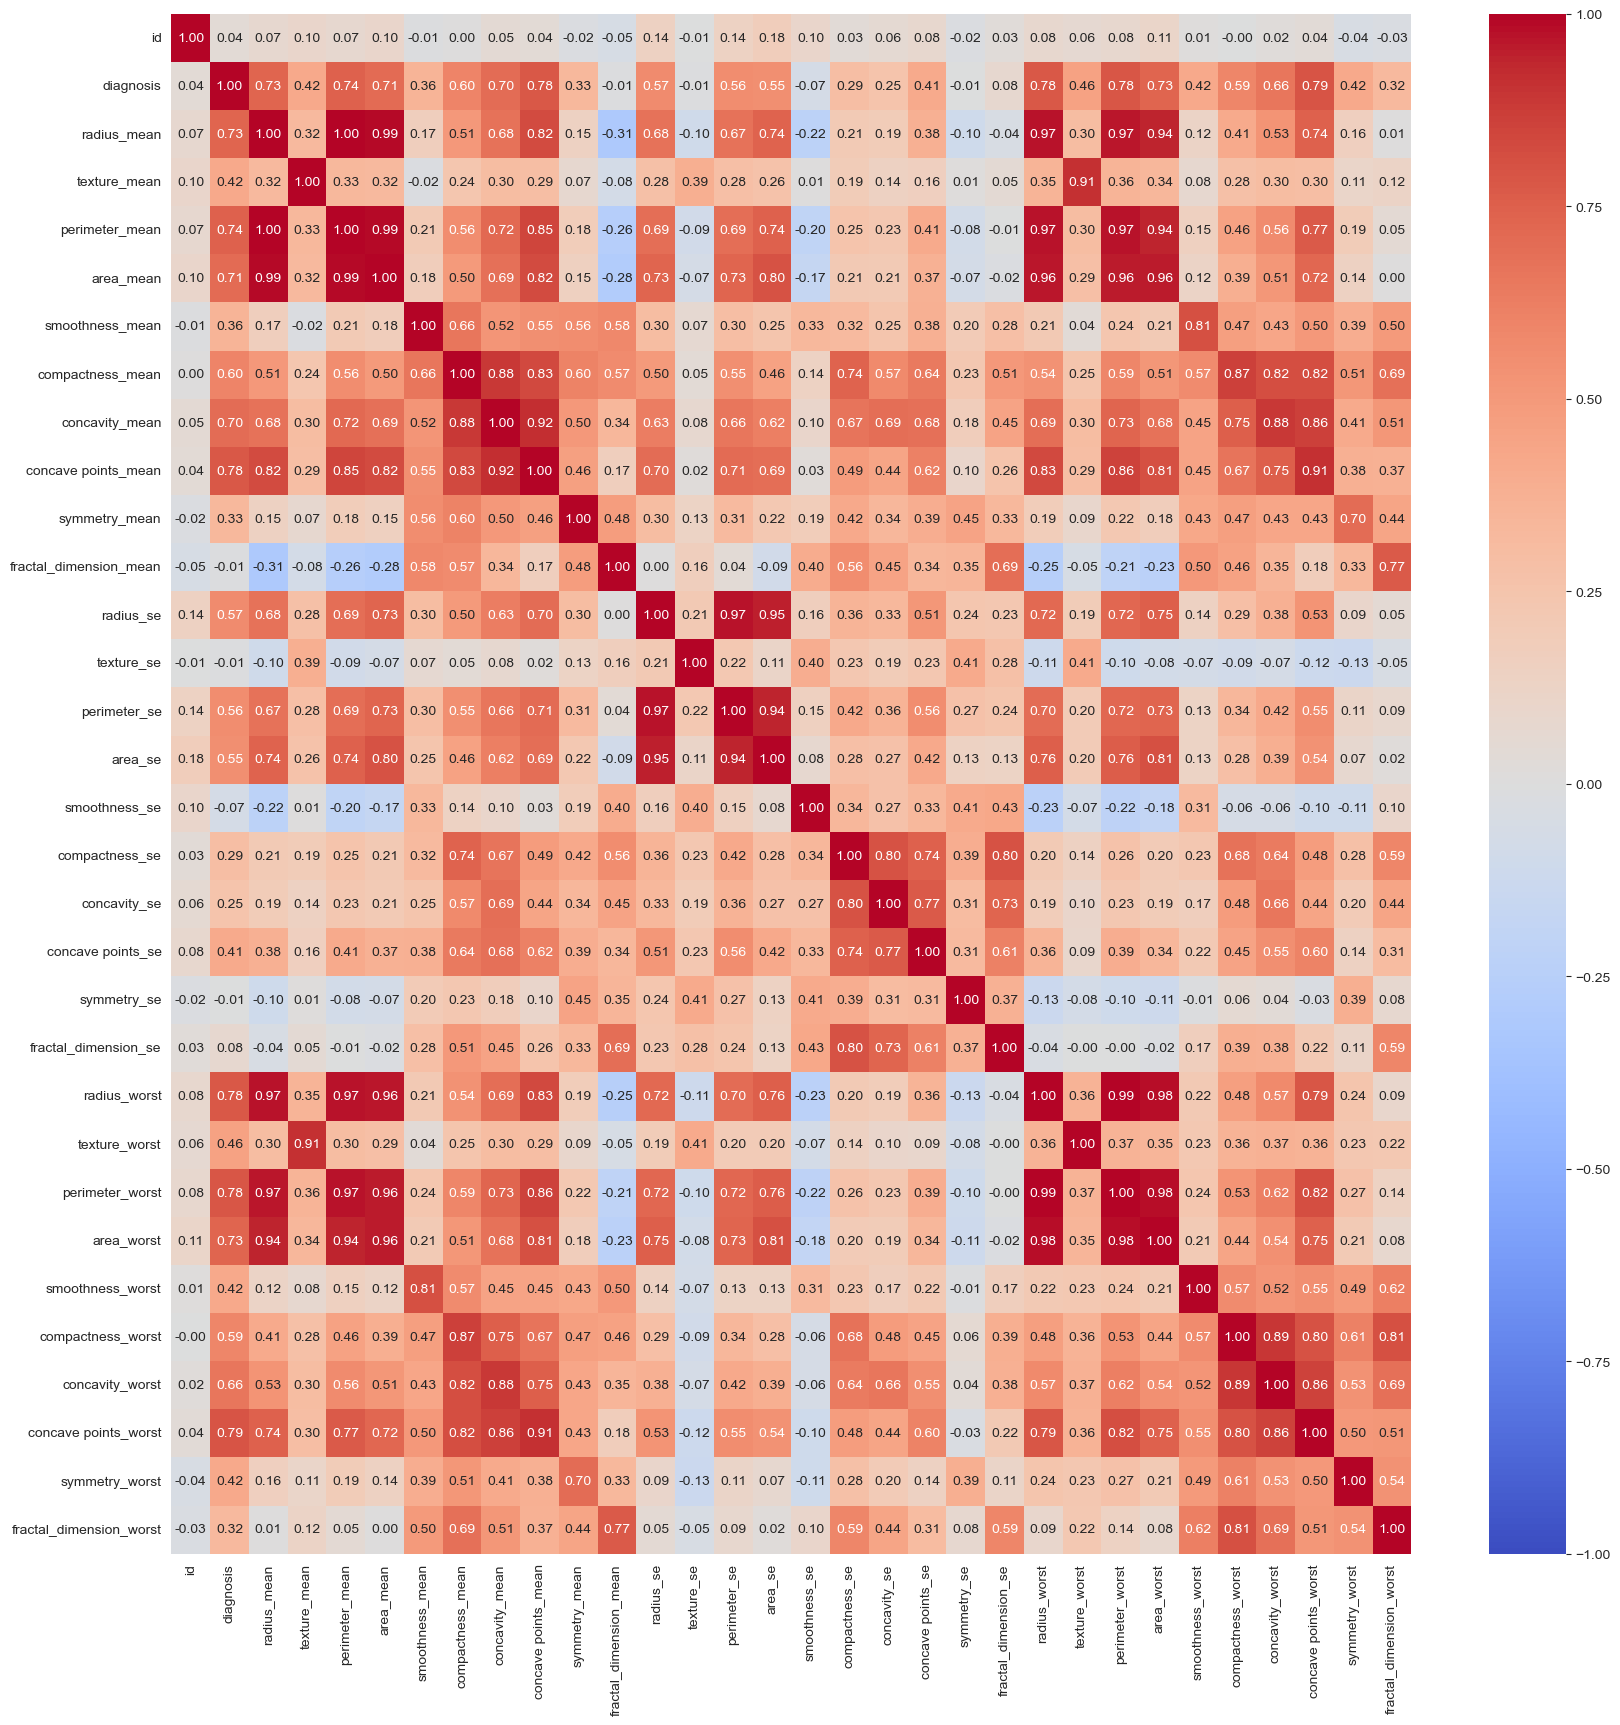

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
id                         0

In [19]:
plt.figure(figsize=(20, 20))
sns.heatmap(cdf.corr(), annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.show()
print(cdf.corr()['diagnosis'].sort_values(ascending=False))

In [24]:
# Subset data voor model
X = cdf.drop('diagnosis', axis=1)
Y = cdf['diagnosis']

In [28]:
# Maak train en test dataset
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=7)

In [29]:
# Init random forest classifier model
model = RandomForestClassifier()
# Fit data aan model
model.fit(X_train, Y_train)
# Voorspelling
Y_pred = model.predict(X_test)

In [34]:
# Bereken en print model score
model.score(X_train, Y_train)
score = round(model.score(X_train, Y_train) * 100, 2)
print(f'modelscore: {score}')
# Bereken en print accuratie:
print(f'Accuratie: {accuracy_score(Y_test, Y_pred)*100}')

modelscore: 100.0
Accuratie: 97.36842105263158


In [36]:
# Laat de meest interessante waardes zien (interessant om te bepale welke waardes nuttig zijn, kan ook met correlatie heatmap):
importances = pd.DataFrame({'feature': X_train.columns, 'importance': np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance', ascending=False).set_index('feature')
print(importances)

                         importance
feature                            
radius_worst                  0.138
area_worst                    0.117
perimeter_worst               0.115
concave points_worst          0.105
concave points_mean           0.099
concavity_mean                0.058
area_se                       0.044
area_mean                     0.042
radius_mean                   0.042
perimeter_mean                0.037
concavity_worst               0.035
compactness_worst             0.022
radius_se                     0.019
texture_worst                 0.014
smoothness_worst              0.012
texture_mean                  0.012
perimeter_se                  0.011
symmetry_worst                0.011
concave points_se             0.007
fractal_dimension_worst       0.007
concavity_se                  0.006
smoothness_mean               0.006
id                            0.005
fractal_dimension_se          0.005
compactness_se                0.005
fractal_dimension_mean      

In [37]:
# Model kan beter worden door variabelen weg te halen of toe te voegen (feature engineering)

## Week 2 Regressie

In [6]:
# laad opniew dataset in
df = pd.read_csv('train.csv')

In [50]:
# Data opschonen
df = df.fillna(0)
# Selecteer alle niet numerieke kolommen
non_numeric_cols = df.select_dtypes(exclude='number')
# Maak voor elke kolom een value mapping naar numeriek. (Benodigd voor random forest algoritme)
for column in non_numeric_cols.columns:
    # Maak een lege dict aan voor de value mapping
    value_mapping = {}
    # Geef elke unieke waarde in de kolom een numerieke waarde
    for unique_value in df[column].unique():
        value_mapping[unique_value] = len(value_mapping) + 1
    # Map de numerieke waarde aan de kolom waarde
    df[column] = df[column].map(value_mapping)

In [54]:
# Scheid de variabele in kenmerken en doel variabele
X = df[['OverallQual']]
y = df['SalePrice']

# Verdeel de dataset in train en test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# init lineair regressie model, 100 decision trees
model = RandomForestRegressor(n_estimators=100, random_state=42)
# Fit het model op de trainingsdata
model.fit(X_train, y_train)
# Maak voorspellingen op de test en train set
train_pred = model.predict(X_test)

In [56]:
# Import sklearn performance metrics
from sklearn.metrics import mean_squared_error

In [57]:
# Bereken de mean squared error (MSE)
mse_train = mean_squared_error(y_test, train_pred)
mse_test = mean_squared_error(y_test, test_pred)

print('MSE Train', mse_train)
print('MSE Test', mse_test)

MSE Train 2140675154.5383484
MSE Test 871645429.5129818
